In [16]:
%load_ext autoreload
%autoreload 2

import os,sys
import datetime as dt
import pandas as pd

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.insert(0, '/scratch/users/udemir15/ELEC491/bassline_transcription')

from utilities import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
def load_data(data_params):     
    dataset_path, scale_type, M = data_params['dataset_path'], data_params['scale_type'], data_params['M']    
    dataset_name = data_params['dataset_name'] +'_{}_M{}.csv'.format(scale_type, M)
    dataset_dir = os.path.join(dataset_path, dataset_name)
    df = pd.read_csv(dataset_dir, header=None)
    titles = df[0].tolist()
    X = df[df.columns[1:]].to_numpy()    
    return X, titles

def append_SOS(X, SOS_token=-1):
    X = np.concatenate( (SOS_token*np.ones((X.shape[0],1), dtype=np.int64), X), axis=1)    
    return X+1 

def print_structured_representation(representation, M, SIL=1, SUS=26):
    print('{} SIL, {} SUS\n'.format(SIL, SUS))
    for i, bar in enumerate(representation[np.arange(0, len(representation)).reshape(4,-1)]):
        print('{:>21}'.format('Bar {}'.format(i)))
        
        
        beats = bar.reshape(4,-1)    
        for j, beat in enumerate(beats):    
            
            if j != 3:
                print('Beat {:9<}: {}'.format(i*4+j, beat))
            else:
                print('Beat {:9<}: {}\n'.format(i*4+j, beat))

def print_symbolic_representation(symbolic_representation):
    
    print('{:^66}\n'.format('Bassline Symbolic Representation'))
    print(symbolic_representation[np.arange(0, len(symbolic_representation)).reshape(4,-1)])
    print('\nRepresentation Vector Length: {} (= 4 Bars = 16 Beats = 64 QuarterBeats)'.format(len(symbolic_representation)))

In [66]:
M = 4

data_params = {'dataset_path': '/scratch/users/udemir15/ELEC491/bassline_transcription/data/datasets/[28, 51]',
               'dataset_name': 'TechHouse_bassline_representations',
               'scale_type': 'min',
               'M': M}

X, titles = load_data(data_params)
X = append_SOS(X)

frequencies = np.unique(X, return_counts=True)

K = X.max()+1 # Number of classes, assumes consecutive
sequence_length = X.shape[1]

print('Number of classes: {}\nSequence Length: {}'.format(K, sequence_length))
print('Number of data points: {}'.format(X.shape[0]))

directories = get_directories('../data/directories.json')

Number of classes: 27
Sequence Length: 129
Number of data points: 4350


Max number of occurance of a class: 113144, min number of class: 330


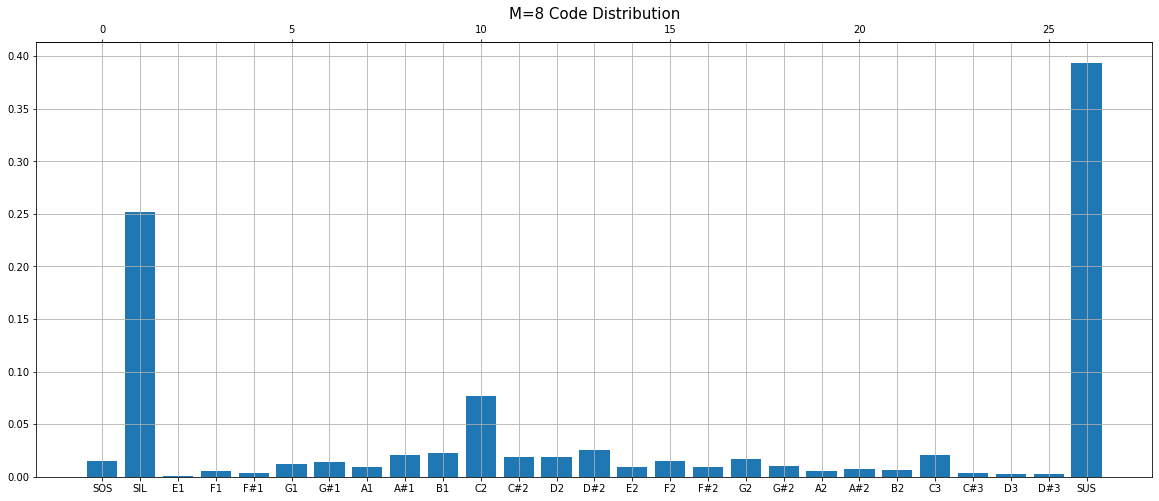

In [63]:
keys = ['SOS', 'SIL'] + ['E1', 'F1', 'F#1', 'G1', 'G#1', 'A1', 'A#1', 'B1'] + ['C2', 'C#2', 'D2', 'D#2', 'E2', 'F2', 'F#2', 'G2', 'G#2', 'A2', 'A#2', 'B2'] + ['C3', 'C#3', 'D3','D#3']+ ['SUS']
print('Max number of occurance of a class: {}, min number of class: {}'.format(frequencies[1].max(),frequencies[1].min()))

fig ,ax = plt.subplots(figsize=(20,8))
plot_title = 'M={} Code Distribution'.format(M)
ax.set_title(plot_title, fontsize=15)
ax.bar(keys, frequencies[1]/frequencies[1].sum())
ax.grid()

secax = ax.secondary_xaxis('top')
#secax.set_xlabel('period [s]')
plt.savefig(plot_title+'.jpg')
plt.show()

In [83]:
weights = frequencies[1].max() / frequencies[1]
weights /= weights.sum()

In [84]:
weights

array([0.01918002, 0.00083162, 0.20806257, 0.04845127, 0.06663985,
       0.02063133, 0.01718144, 0.02560868, 0.01162183, 0.01027501,
       0.00313587, 0.01218357, 0.01283784, 0.00979722, 0.02495755,
       0.01645623, 0.02689655, 0.01493878, 0.02496502, 0.0448324 ,
       0.03349381, 0.04144714, 0.01337926, 0.0761946 , 0.11919013,
       0.09656608, 0.00024433])

In [76]:
def print_structured_representation(representation, M, SIL=1, SUS=26):
    print('{} SIL, {} SUS\n'.format(SIL, SUS))
    
    bars = representation[np.arange(0, len(representation)).reshape(4,-1)]
    for i, bar in enumerate(bars):
        print('{:>21}'.format('Bar {}'.format(i)))
        
        beats = bar.reshape(4,-1)                        
        for j, beat in enumerate(beats):            
            if M == 8:
                string = 'Beat {:9<}: {}'.format(i*4+j, beat)
                if j != 3:
                    string += '\n'
                print(string)                   
            if M == 4:
                print('Beat {:9<}:'.format(i*4+j))                
                qbeats = beat.reshape(4,-1)
                
                for k, qbeat in enumerate(qbeats):
                    string = 'Q-B {:9<}: {}'.format(k, qbeat)
                    if k==3:
                        string += '\n'
                    print(string)

In [77]:
idx = 80
vector = X[idx,1:]
title = titles[idx]
print(title)
print_structured_representation(vector, M)

Nico Balducci - Adesso (Original Mix)
1 SIL, 26 SUS

                Bar 0
Beat 0:
Q-B 0: [ 1 26]
Q-B 1: [26 26]
Q-B 2: [26 14]
Q-B 3: [ 1 14]

Beat 1:
Q-B 0: [26  1]
Q-B 1: [26 26]
Q-B 2: [26  9]
Q-B 3: [1 9]

Beat 2:
Q-B 0: [ 1 26]
Q-B 1: [26 26]
Q-B 2: [26 14]
Q-B 3: [ 1 14]

Beat 3:
Q-B 0: [ 1 26]
Q-B 1: [26 26]
Q-B 2: [26  9]
Q-B 3: [1 9]

                Bar 1
Beat 4:
Q-B 0: [ 1 26]
Q-B 1: [26 26]
Q-B 2: [26 14]
Q-B 3: [ 1 14]

Beat 5:
Q-B 0: [ 1 26]
Q-B 1: [26 26]
Q-B 2: [26  9]
Q-B 3: [1 9]

Beat 6:
Q-B 0: [ 1 10]
Q-B 1: [ 1 26]
Q-B 2: [26 14]
Q-B 3: [ 1 14]

Beat 7:
Q-B 0: [ 1 26]
Q-B 1: [26 26]
Q-B 2: [26  9]
Q-B 3: [1 9]

                Bar 2
Beat 8:
Q-B 0: [ 1 26]
Q-B 1: [26 26]
Q-B 2: [26 14]
Q-B 3: [ 1 14]

Beat 9:
Q-B 0: [ 1 26]
Q-B 1: [26 26]
Q-B 2: [26  9]
Q-B 3: [1 9]

Beat 10:
Q-B 0: [ 1 10]
Q-B 1: [ 1 26]
Q-B 2: [26 14]
Q-B 3: [ 1 14]

Beat 11:
Q-B 0: [ 1 26]
Q-B 1: [26 26]
Q-B 2: [26  9]
Q-B 3: [1 9]

                Bar 3
Beat 12:
Q-B 0: [ 1 10]
Q-B 1: [ 1 26]
Q-

		John Summit - Make Me Feel (Original Mix)

Chorus

Fs = 44100, x.shape = (84010,), x.dtype = float32


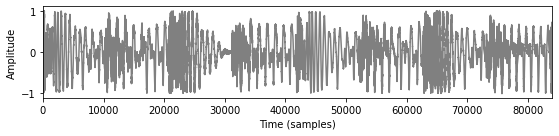

Bassline

Fs = 44100, x.shape = (84010,), x.dtype = float64


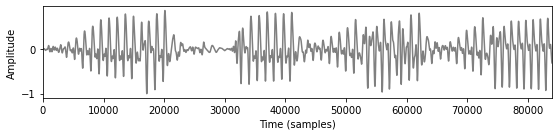

In [60]:
inspect_audio_outputs(title, directories, start=0, end=1)

In [ ]:
# Dreams of Morjim      | drop mistake
# Camilo Do Santos - Bubba Mint (Original Mix)   | note melodic